# Supervised Learning with CNNs

Hopefully the idea of supervised learning in the last lecture seemed natural, especially given that you've known its simplest version, *linear regression*, for years.

Some data is more complicated, though, and requires using different neural network architectures. This might seem counter-intuitive, since networks of the type we've used so far (called deep neural network, or dense network, or fully-connected network, or multi-layer perceptron) are universal function approximators, meaning that they can approximate any function to arbitrary precision. But the problem is that the number of parameters in a dense network grows very quickly with the number of inputs, so even though there is a good NN in the class *in principle*, it might be very hard to find it in practice.



A convolutional neural network is a type of neural network that is designed to work well with images. To get the basic idea, consider the following image from [Data Science Applications to String Theory](https://www.sciencedirect.com/science/article/pii/S0370157319303072)
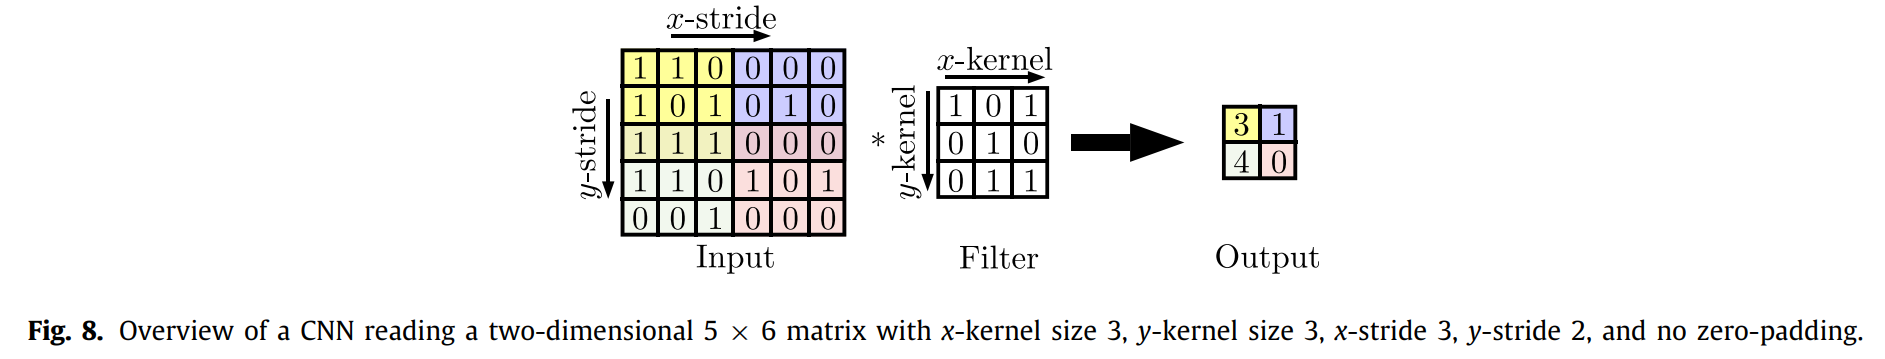
We would like to turn this into an equation in the context of a 2d convolution. There's a lot going on here, bear with me:
- **Input Tensor ($X$)**: The input data to the convolutional layer.
  - Dimensions: $(H_{\text{in}}, W_{\text{in}}, C_{\text{in}})$
  - Where $H_{\text{in}}$ is the height, $W_{\text{in}}$ is the width, and $C_{\text{in}}$ is the number of input channels.
- **Kernel/Filter ($W$)**: The weights of the convolutional layer used to perform the convolution.
  - Dimensions: $(k, k, C_{\text{in}}, C_{\text{out}})$
  - Where $k$ is the kernel size, $C_{\text{in}}$ is the number of input channels, and $C_{\text{out}}$ is the number of output channels.
- **Output Tensor ($Y$)**: The result of the convolution operation.
  - Dimensions: $(H_{\text{out}}, W_{\text{out}}, C_{\text{out}})$
  - Where $H_{\text{out}}$ is the height, $W_{\text{out}}$ is the width, and $C_{\text{out}}$ is the number of output channels.
- **Padding ($p$)**: The number of pixels added to the input data on all sides before performing the convolution.
- **Dilation ($d$)**: The spacing between kernel values. A dilation of 1 means there is no spacing, 2 means one pixel is skipped, and so on.
- **Kernel Size ($k$)**: The height and width of the convolution kernel. Common values are 3, 5, and 7.
- **Stride ($s$)**: The step size at which the kernel is applied to the input data. A stride of 1 means the kernel is applied to consecutive regions, 2 means every other region, and so on.
- **Equation**: The Conv2D operation can be described with the following equation:

  $$
  Y(i, j, c_{\text{out}}) = \sum_{c_{\text{in}}=0}^{C_{\text{in}}-1} \sum_{m=0}^{k-1} \sum_{n=0}^{k-1} X\left( s \cdot i + m \cdot d - p, \ s \cdot j + n \cdot d - p, c_{\text{in}} \right) \cdot W(m, n, c_{\text{in}}, c_{\text{out}})
  $$

  Where:
  - $i = 0, 1, \dots, H_{\text{out}}-1$
  - $j = 0, 1, \dots, W_{\text{out}}-1$
  - $c_{\text{out}} = 0, 1, \dots, C_{\text{out}}-1$


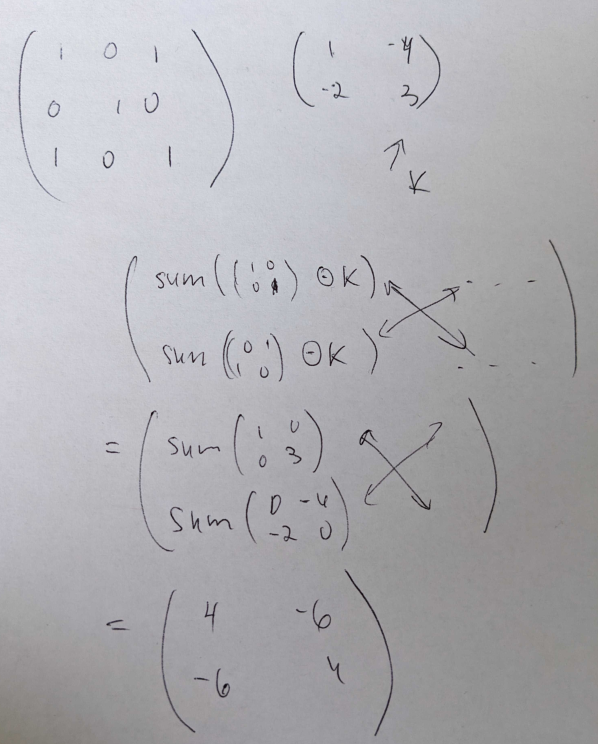

We'll need something else called max pooling. A maxpool2d layer is a layer that takes the maximum value of a region of the input data. It's similar to a convolutional layer, but instead of performing a linear operation, it performs a max operation.

Now let's see how maxpool works. Torch requires NCHW format, which means that the first dimension is the batch size, the second is the number of channels, and the last two are the height and width.

This is what we would expect from a 2x2 kernel passing over the image starting from the upper left with stride 2.

# Galaxy Classification

We'll now classify galaxies according to spiral, elliptical, or unknown. The data is provided by the [Galaxy Zoo](https://data.galaxyzoo.org) project. See [this publication](http://adsabs.harvard.edu/abs/2008MNRAS.389.1179L) for more details. The pictures of the galaxies themselves are provided by the [Sloan Digital Sky Survey](https://www.sdss.org). 

I'll provide you with a zip file so that you can do this locally on your machine, too!

We'll begin with some initializations:

Now we'll read in array with information and perform a train : test split

Let's normalize to have zero mean and unit variance

over-/under-sample for a balanced training set and perform a train : test split of 90 : 10

Plot the first few

Setup the neural network

Time to train!